# Summary_kaggle_best

This is the notebook which has all the best things which has been done on Kaggle.
This other notebook named 'Kaggle_best' comprises of evrything including what we have tweaked and improved from the Kaggle competitions.

I have adapted most of the EDA work from this notebook because in this notebook they have included everything which i need for my model implementation and other work.

In this notebook they have perfectly summerize the data and done excellent data analysis.

#### References:
* [1] https://www.kaggle.com/philippsp/exploratory-analysis-instacart
* [2] https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart

In [1]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

#Loading all the csv files

df_aisles = pd.read_csv("aisles.csv")
df_departments = pd.read_csv("departments.csv")
df_order_products_prior = pd.read_csv("order_products__prior.csv")
df_order_products_train = pd.read_csv("order_products__train.csv")
df_orders = pd.read_csv("orders.csv")
df_products = pd.read_csv("products.csv")

In [2]:
df_orders.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0

In [3]:
df_orders.shape

(3421083, 7)

In [4]:
df_orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In the dataset there is a column called eval_set. It bascially tells us that to which csv (train or test) is the column corresponding to. Let us take the count of our test and train values.

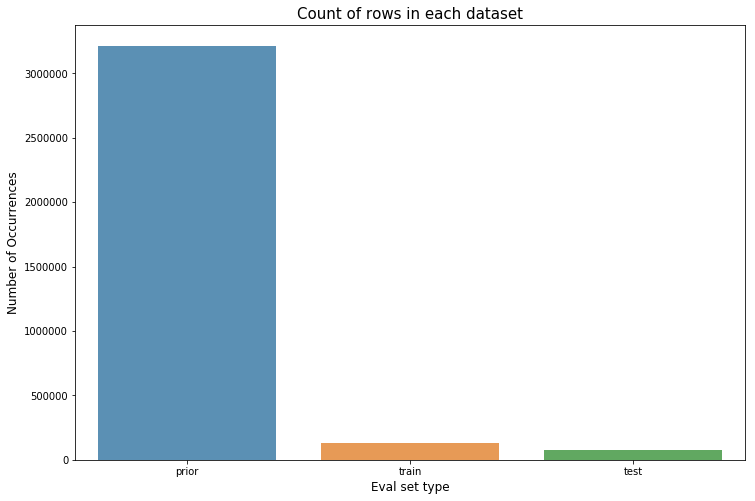

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


In [5]:
cnt_srs = df_orders.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.show()
print(cnt_srs)

So, in total there have been 3214874 orders and 131209 has been provided for training the model and we need to predict for 75000

We need to know

In [6]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = df_orders.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

So, we figured out that there are total 206209 customers in total. We figured that out using the groupby for user_id and getting the unique count function.

It is told to us that the prior orders for any customer ranging between 4 to 100 is given. Validating it below.

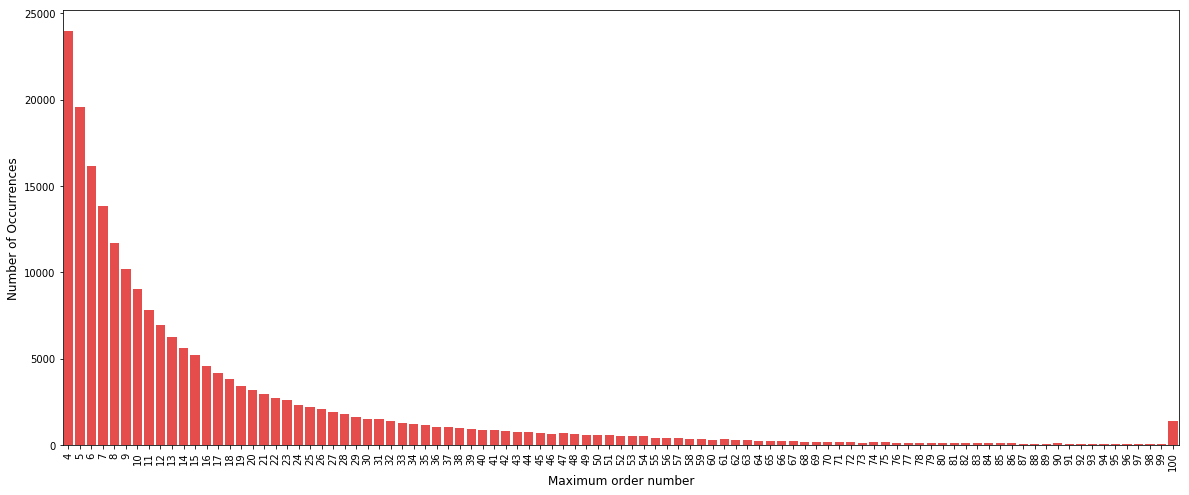

In [7]:
cnt_srs = df_orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(20,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color = 'red')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

So, as per the graph above, it is clear that minimum number of previous orders is 4 and maximum is 100

To know more about the customer ordering behaviour pattern, let us first see which day of the week has maximum number of orders.

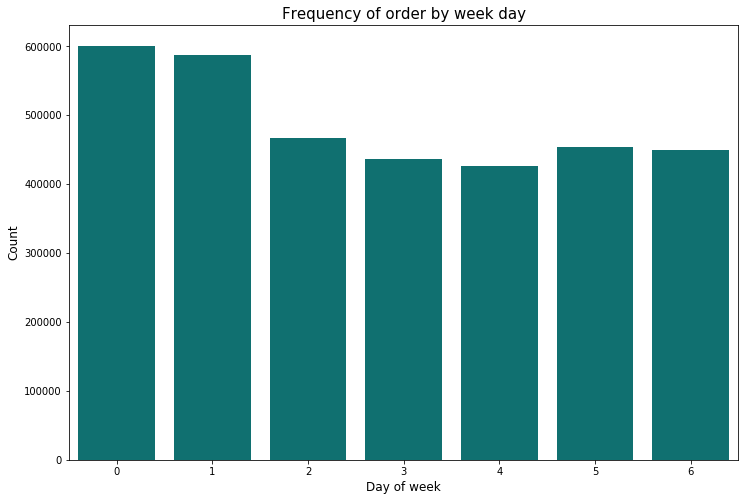

order_dow
0    600905
1    587478
2    467260
3    436972
4    426339
5    453368
6    448761
Name: order_id, dtype: int64

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=df_orders, color='teal')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Frequency of order by week day", fontsize=15)
plt.show()
cnt_dow = df_orders.groupby('order_dow')['order_id'].aggregate(get_unique_count)
cnt_dow

We see that on days 0 and 1 maximum number of orders are being placed. So, it's during the weekend that most of the customers tend to order and then ordering tends to go down.




Now, let us try to find out the time of the day when maximum orders are being placed like morning, evening or afternoon.

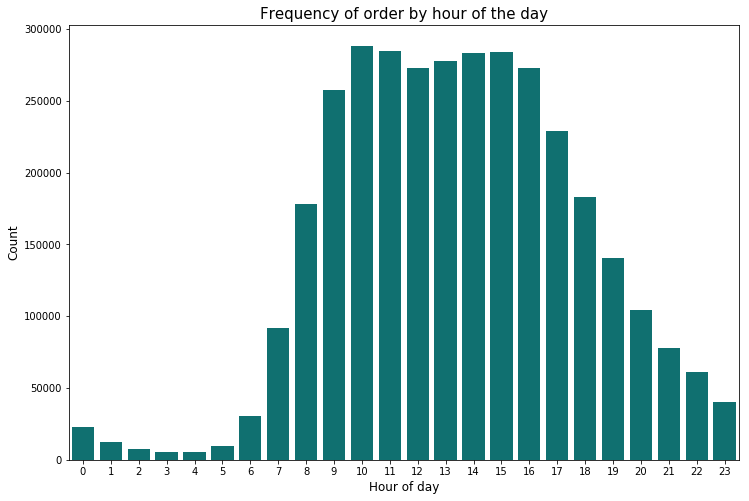

order_hour_of_day
0      22758
1      12398
2       7539
3       5474
4       5527
5       9569
6      30529
7      91868
8     178201
9     257812
10    288418
11    284728
12    272841
13    277999
14    283042
15    283639
16    272553
17    228795
18    182912
19    140569
20    104292
21     78109
22     61468
23     40043
Name: order_id, dtype: int64

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=df_orders, color='teal')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Frequency of order by hour of the day", fontsize=15)
plt.show()
cnt_hod = df_orders.groupby('order_hour_of_day')['order_id'].aggregate(get_unique_count)
cnt_hod

So, the peak hours for ordering are during 10:00 AM to 3:00 PM

So, day time of Saturday and Sunday is the peak time for ordering. Let us just plot a heat map to make if more clear.

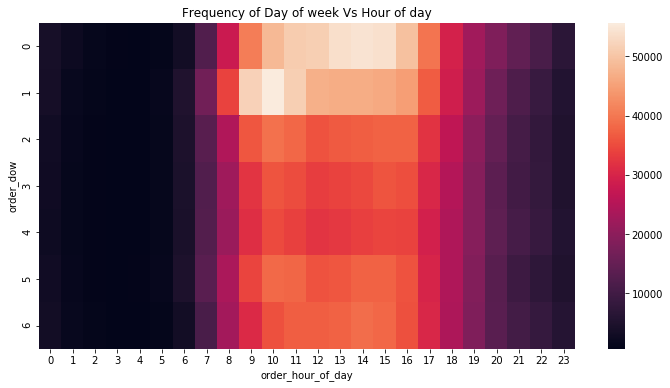

In [10]:
grouped_df = df_orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

Let us now check what is the time period for reordering using the column called days_since_prior order.

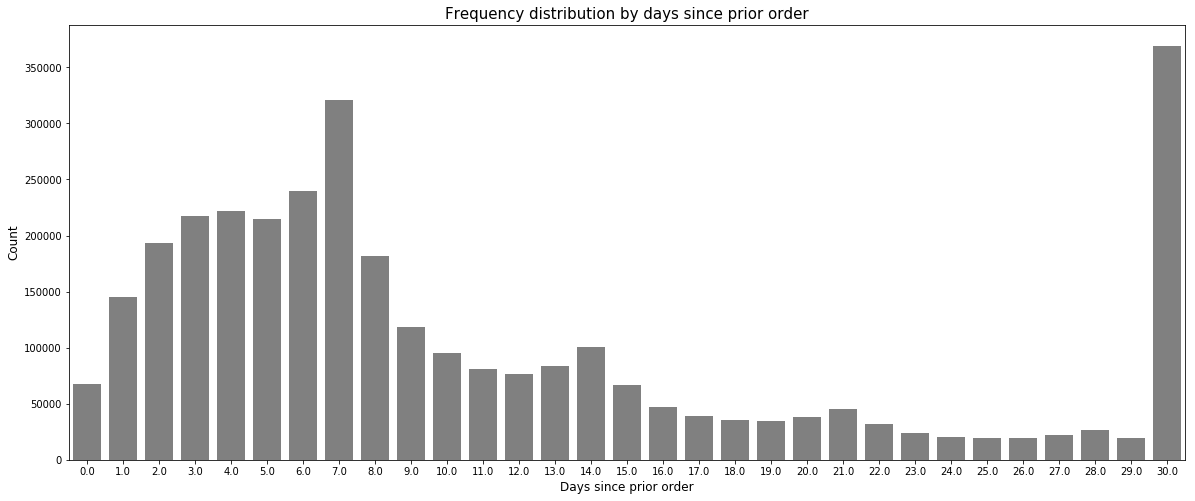

In [11]:
plt.figure(figsize=(20,8))
sns.countplot(x="days_since_prior_order", data=df_orders, color='grey')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [12]:
# percentage of re-orders in prior set #
df_order_products_prior.reordered.sum() / df_order_products_prior.shape[0]

0.5896974667922161

In [13]:
# percentage of re-orders in train set #
df_order_products_train.reordered.sum() / df_order_products_train.shape[0]

0.5985944127509629

So, on an average, 59% of the ordered products are reordered again.

Let us see the number of products bought in each order.

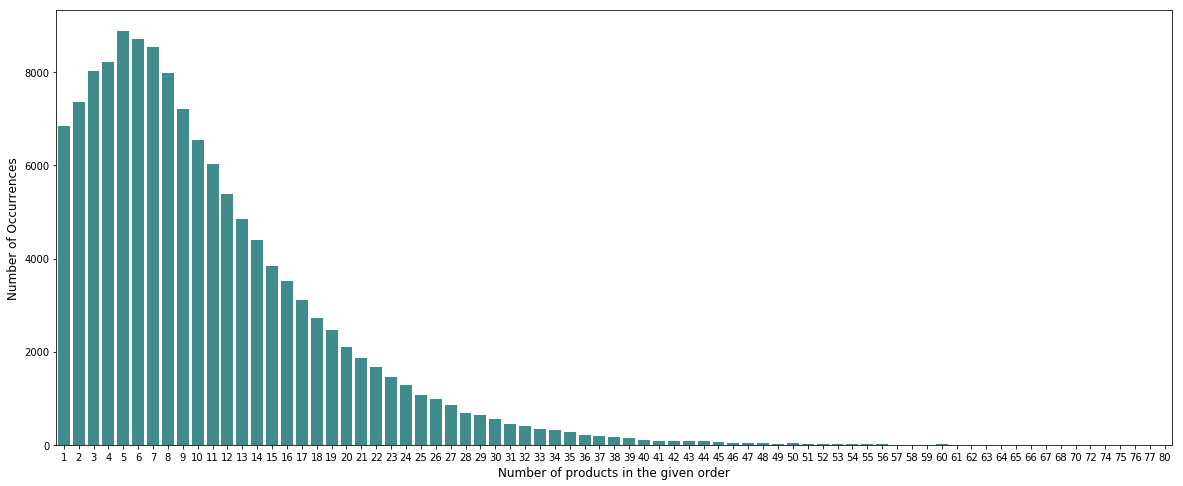

In [14]:
grouped_df = df_order_products_train.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(20,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color = 'teal')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
#plt.xticks(rotation='vertical')
plt.show()

So, mostly 5 items per order

Let us merge the tables to get a greater overview of our dataset.

In [15]:
df_order_products_prior = pd.merge(df_order_products_prior, df_products, on='product_id', how='left')
df_order_products_prior = pd.merge(df_order_products_prior, df_aisles, on='aisle_id', how='left')
df_order_products_prior = pd.merge(df_order_products_prior, df_departments, on='department_id', how='left')
df_order_products_prior.head()

order_id  product_id  add_to_cart_order  reordered           product_name  \
0         2       33120                  1          1     Organic Egg Whites   
1         2       28985                  2          1  Michigan Organic Kale   
2         2        9327                  3          0          Garlic Powder   
3         2       45918                  4          1         Coconut Butter   
4         2       30035                  5          0      Natural Sweetener   

   aisle_id  department_id               aisle  department  
0        86             16                eggs  dairy eggs  
1        83              4    fresh vegetables     produce  
2       104             13   spices seasonings      pantry  
3        19             13       oils vinegars      pantry  
4        17             13  baking ingredients      pantry

Let's have a look at the top grossing products

In [16]:
cnt_srs = df_order_products_prior['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

product_name  frequency_count
0                     Banana           472565
1     Bag of Organic Bananas           379450
2       Organic Strawberries           264683
3       Organic Baby Spinach           241921
4       Organic Hass Avocado           213584
5            Organic Avocado           176815
6                Large Lemon           152657
7               Strawberries           142951
8                      Limes           140627
9         Organic Whole Milk           137905
10       Organic Raspberries           137057
11      Organic Yellow Onion           113426
12            Organic Garlic           109778
13          Organic Zucchini           104823
14       Organic Blueberries           100060
15            Cucumber Kirby            97315
16        Organic Fuji Apple            89632
17             Organic Lemon            87746
18  Apple Honeycrisp Organic            85020
19    Organic Grape Tomatoes            84255

So, it mostly fruits which customers prefer to buy. So, hopefully the most used aisles should correspond to fruits. Let us look at that.

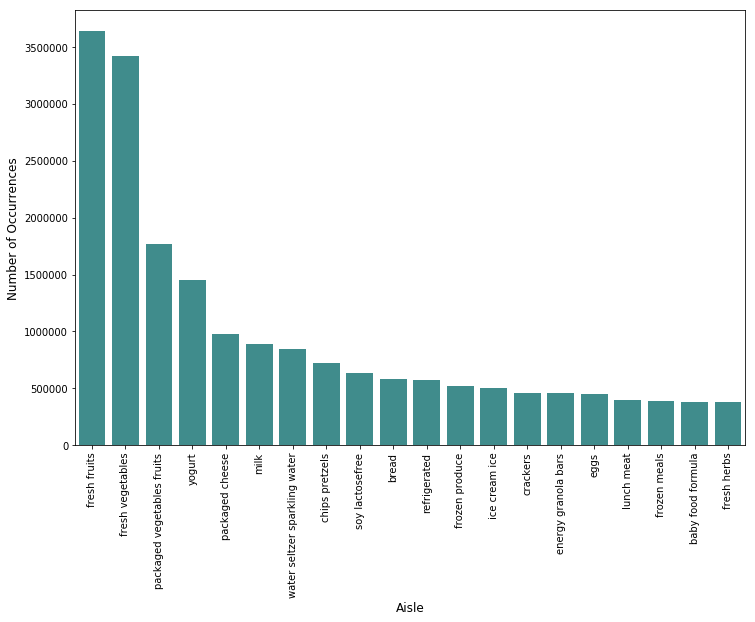

In [17]:
cnt_srs = df_order_products_prior['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='teal')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Clearly, fresh fruits and fresh vegetables are the top grossing products and their aisles are the most shopped from.

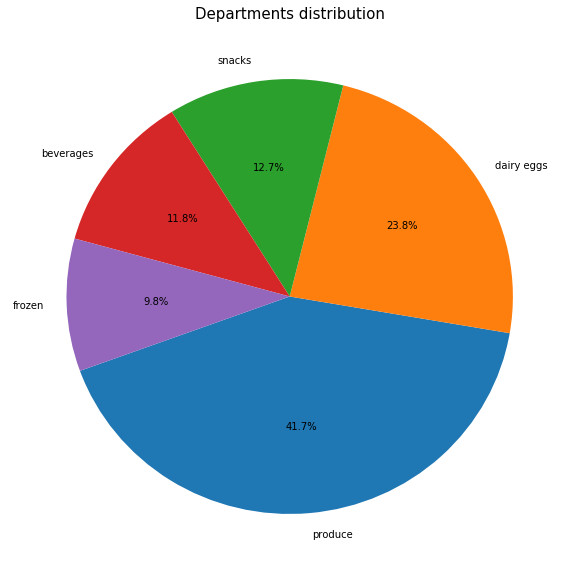

In [18]:
plt.figure(figsize=(10,10))
temp_series = df_order_products_prior['department'].value_counts().head(5)
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

It is clear that the produce department is selling the most.

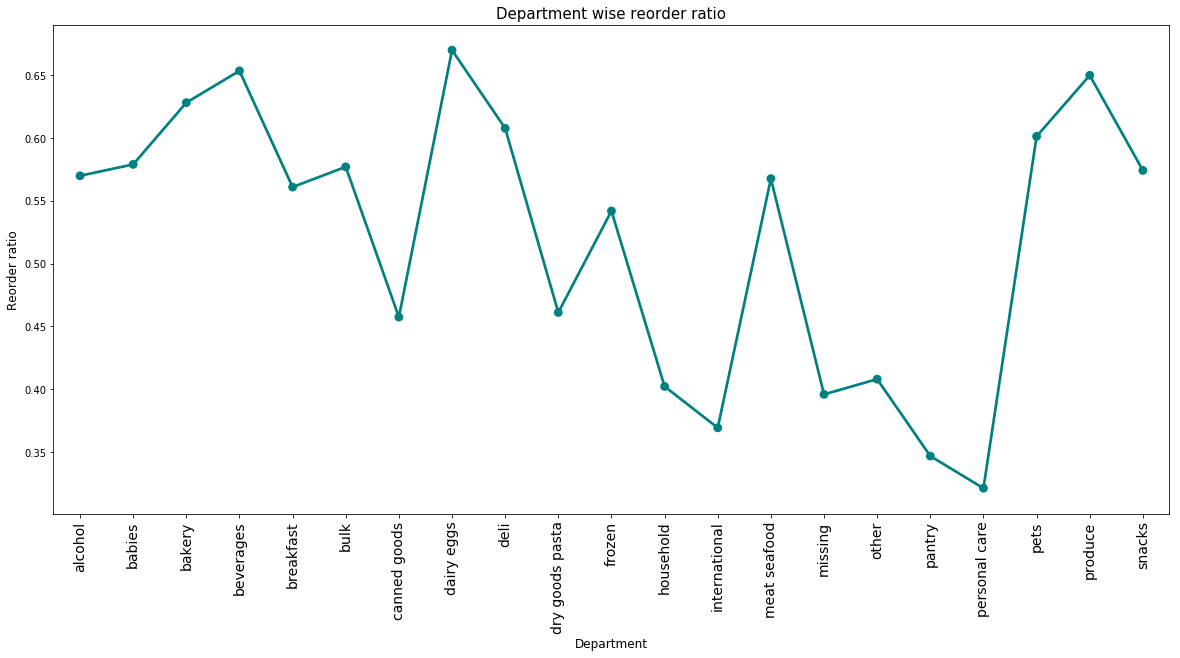

In [20]:
grouped_df = df_order_products_prior.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(20,9))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color='teal')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical',fontsize=14)
plt.show()

Dairy eggs have the reorder ratio and personal care has the lowest.

C:\Users\dhari\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



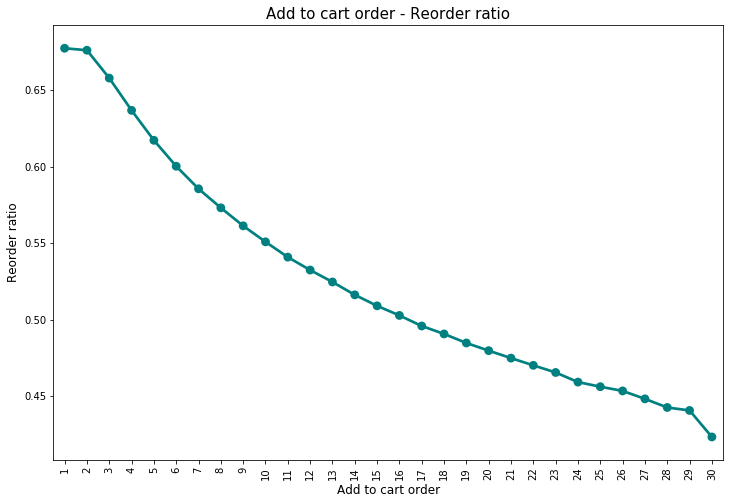

In [21]:
df_order_products_prior["add_to_cart_order_mod"] = df_order_products_prior["add_to_cart_order"].copy()
df_order_products_prior["add_to_cart_order_mod"].loc[df_order_products_prior["add_to_cart_order_mod"]>30] = 30
grouped_df = df_order_products_prior.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color='teal')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

So, the order in which you out items in your cart does matter when you reorder. This makes sense to us as well since we tend to first order all the products we used to buy frequently and then look out for the new products available.

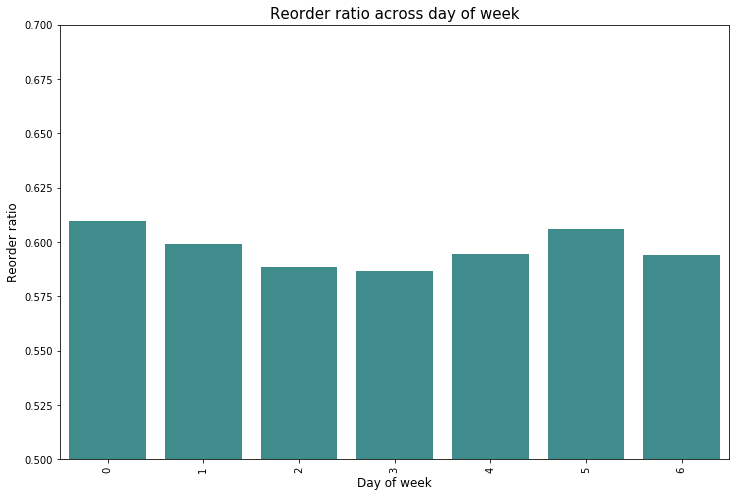

In [22]:
df_order_products_train = pd.merge(df_order_products_train, df_orders, on='order_id', how='left')
grouped_df = df_order_products_train.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color='teal')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

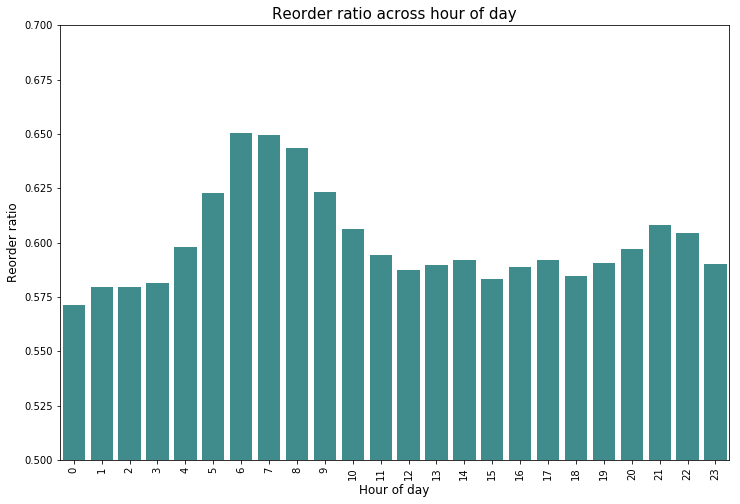

In [23]:
grouped_df = df_order_products_train.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color='teal')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

In [24]:
df_bow = pd.read_csv("bow.csv")

Cultural Divesrsity of Products:
* This was in R and we tweaked this in Python.

In [25]:
#Bag of Words with Name of Cultures
df_bow.Culture_names

0      Afrikaans
1       Albanian
2         Arabic
3       Armenian
4          Azeri
5         Basque
6     Belarusian
7      Bulgarian
8        Catalan
9        Chinese
10      Croatian
11         Czech
12        Danish
13       Dhivehi
14         Dutch
15       English
16      Estonian
17       Faroese
18         Farsi
19       Finnish
20        French
21      Galician
22      Georgian
23        German
24         Greek
25      Gujarati
26        Hebrew
27         Hindi
28     Hungarian
29     Icelandic
         ...    
37        Kyrgyz
38       Latvian
39    Lithuanian
40    Macedonian
41         Malay
42       Marathi
43     Mongolian
44     Norwegian
45        Polish
46    Portuguese
47       Punjabi
48      Romanian
49       Russian
50      Sanskrit
51       Serbian
52        Slovak
53     Slovenian
54       Spanish
55       Swahili
56       Swedish
57        Syriac
58         Tamil
59         Tatar
60        Telugu
61          Thai
62       Turkish
63     Ukrainian
64          Ur

In [26]:
for x in df_bow.Culture_names :
    print(x)

Afrikaans
Albanian
Arabic
Armenian
Azeri
Basque
Belarusian
Bulgarian
Catalan
Chinese
Croatian
Czech
Danish
Dhivehi
Dutch
English
Estonian
Faroese
Farsi
Finnish
French
Galician
Georgian
German
Greek
Gujarati
Hebrew
Hindi
Hungarian
Icelandic
Indonesian
Italian
Japanese
Kannada
Kazakh
Konkani
Korean
Kyrgyz
Latvian
Lithuanian
Macedonian
Malay
Marathi
Mongolian
Norwegian
Polish
Portuguese
Punjabi
Romanian
Russian
Sanskrit
Serbian
Slovak
Slovenian
Spanish
Swahili
Swedish
Syriac
Tamil
Tatar
Telugu
Thai
Turkish
Ukrainian
Urdu
Uzbek
Vietnamese


In [27]:
df_products.product_name

0                               Chocolate Sandwich Cookies
1                                         All-Seasons Salt
2                     Robust Golden Unsweetened Oolong Tea
3        Smart Ones Classic Favorites Mini Rigatoni Wit...
4                                Green Chile Anytime Sauce
5                                             Dry Nose Oil
6                           Pure Coconut Water With Orange
7                        Cut Russet Potatoes Steam N' Mash
8                        Light Strawberry Blueberry Yogurt
9           Sparkling Orange Juice & Prickly Pear Beverage
10                                       Peach Mango Juice
11                              Chocolate Fudge Layer Cake
12                                       Saline Nasal Mist
13                          Fresh Scent Dishwasher Cleaner
14                                Overnight Diapers Size 6
15                           Mint Chocolate Flavored Syrup
16                                       Rendered Duck F

In [28]:
cultname=[]

In [29]:
#Splitting each Product in sepaarte Words
for i in df_products.product_name:
    a=i.split()
    for j in df_bow.Culture_names:
        if j in a:
            cultname.append(j)

In [30]:
#Combining the pair in dictionary
counts = dict()
for i in cultname:
    counts[i] = counts.get(i,0) + 1
print(counts)

{'Italian': 400, 'French': 348, 'Danish': 18, 'English': 118, 'Chinese': 25, 'Greek': 506, 'Thai': 113, 'Spanish': 38, 'Norwegian': 6, 'Polish': 41, 'German': 20, 'Korean': 22, 'Russian': 15, 'Japanese': 29, 'Swedish': 19, 'Portuguese': 3, 'Dutch': 18, 'Bulgarian': 7, 'Punjabi': 5, 'Icelandic': 23, 'Basque': 1, 'Turkish': 10, 'Vietnamese': 11, 'Mongolian': 3, 'Armenian': 1, 'Lithuanian': 1, 'Indonesian': 3, 'Hungarian': 3}


In [31]:
counts.keys()

dict_keys(['Italian', 'French', 'Danish', 'English', 'Chinese', 'Greek', 'Thai', 'Spanish', 'Norwegian', 'Polish', 'German', 'Korean', 'Russian', 'Japanese', 'Swedish', 'Portuguese', 'Dutch', 'Bulgarian', 'Punjabi', 'Icelandic', 'Basque', 'Turkish', 'Vietnamese', 'Mongolian', 'Armenian', 'Lithuanian', 'Indonesian', 'Hungarian'])

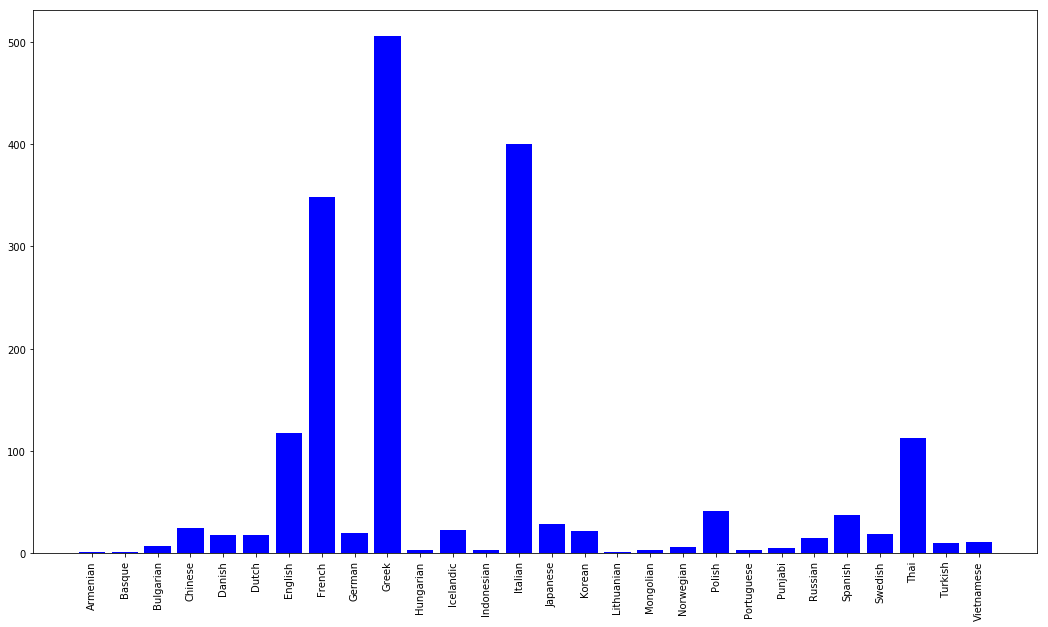

In [32]:
#Bar plot of Dictionary
plt.figure(figsize=(18,10))
plt.bar(counts.keys(),counts.values(),color='b')
plt.xticks(rotation='vertical')
plt.show()

#### References:
* [1] https://www.kaggle.com/philippsp/exploratory-analysis-instacart
* [2] https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart